In [249]:
import numpy as np
import sklearn
import torch
import scipy
from matplotlib import pylab as plt
import matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/artem/Main/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Generate data

In [244]:
N_SAMPLES  = 50
def simple_data_generator(size, random_state=None):
    np.random.seed(random_state)
    return np.random.random(size=(size, 2))

def data_generator(size = N_SAMPLES, density_square=[(0, 0.2, 0, 1)], density=[0.5], random_state=None):
    np.random.seed(random_state)
    gen_data_size = 0
    data=np.array([]).reshape(0,2)
    for d, square in zip(density, density_square):
        if(d > 1):
            print("density must be float in range [0, 1]:", density)
            return
        
        size_i=int(size * d)
        x_data_i = np.random.random(size=(size_i, 1)) * (square[1] - square[0]) + square[0]
        y_data_i = np.random.random(size=(size_i, 1)) * (square[3] - square[2]) + square[2]
        data = np.vstack((data, hstack((x_data_i, y_data_i))))
        #print(data)
        gen_data_size += size_i
    if gen_data_size < size:
        data = np.vstack((data, np.random.random(size=(size-gen_data_size, 2))))
    return data

random_state=20
test_datasets_lite = [
    data_generator(50, density=[0.7], random_state=random_state),
    data_generator(50, density_square=[(0.2, 0.4, 0., 0.2), (0.5, 0.7, 0.8, 1)], density=[0.45, 0.45], random_state=random_state),
    data_generator(50, [(0, 1, 0, 0.2)], [1], random_state=random_state),
    data_generator(50, [(0, 0.8, 0, 0.2), (0.8, 1, 0, 1)], density=[0.55, 0.4], random_state=random_state),
    data_generator(50, [(0, 0.2, 0.6, 0.8), (0.8, 1, 0.7, 0.8)], [0.45, 0.45], random_state=random_state),
    data_generator(50, [(0, 0.2, 0, 0.8), (0, 1, 0.8, 1)], density=[0.45, 0.45], random_state=random_state),
    data_generator(50, [(0, 0.2, 0, 0.2), (0.2, 0.4, 0.2, 0.4),
                         (0.4, 0.6, 0.4, 0.6), (0.6, 0.8, 0.6, 0.8), (0.8, 1, 0.8, 1)], [0.19, 0.19, 0.19, 0.19, 0.19], random_state=random_state),
]

test_datasets_medium = [
    data_generator(200, density=[0.7], random_state=random_state),
    data_generator(200, density_square=[(0.2, 0.4, 0., 0.2), (0.5, 0.7, 0.8, 1)], density=[0.45, 0.45], random_state=random_state),
    data_generator(200, [(0, 1, 0, 0.2)], [1], random_state=random_state),
    data_generator(200, [(0, 0.8, 0, 0.2), (0.8, 1, 0, 1)], density=[0.55, 0.4], random_state=random_state),
    data_generator(200, [(0, 0.2, 0.6, 0.8), (0.8, 1, 0.7, 0.8)], [0.45, 0.45], random_state=random_state),
    data_generator(200, [(0, 0.2, 0, 0.8), (0, 1, 0.8, 1)], density=[0.45, 0.45], random_state=random_state),
    data_generator(200, [(0, 0.2, 0, 0.2), (0.2, 0.4, 0.2, 0.4),
                         (0.4, 0.6, 0.4, 0.6), (0.6, 0.8, 0.6, 0.8), (0.8, 1, 0.8, 1)], [0.19, 0.19, 0.19, 0.19, 0.19], random_state=random_state),
]

test_datasets_hard = [
    data_generator(500, density=[0.7], random_state=random_state + 1),
    data_generator(500, density_square=[(0.2, 0.4, 0., 0.2), (0.5, 0.7, 0.8, 1)], density=[0.45, 0.45], random_state=random_state + 1),
    data_generator(500, [(0, 1, 0, 0.2)], [1], random_state=random_state + 1),
    data_generator(500, [(0, 0.8, 0, 0.2), (0.8, 1, 0, 1)], density=[0.55, 0.4], random_state=random_state + 1),
    data_generator(500, [(0, 0.2, 0.6, 0.8), (0.8, 1, 0.7, 0.8)], [0.45, 0.45], random_state=random_state + 1),
    data_generator(500, [(0, 0.2, 0, 0.8), (0, 1, 0.8, 1)], density=[0.45, 0.45], random_state=random_state + 1),
    data_generator(500, [(0, 0.2, 0, 0.2), (0.2, 0.4, 0.2, 0.4),
                         (0.4, 0.6, 0.4, 0.6), (0.6, 0.8, 0.6, 0.8), (0.8, 1, 0.8, 1)], [0.19, 0.19, 0.19, 0.19, 0.19], random_state=random_state + 1),
]

test_datasets_pro = [
    np.random.random(size=(1000, 2)),
    data_generator(1000, density=[0.7], random_state=random_state),
    data_generator(1000, density_square=[(0.2, 0.4, 0., 0.2), (0.5, 0.7, 0.8, 1)], density=[0.45, 0.45], random_state=random_state),
    data_generator(1000, [(0, 1, 0, 0.2)], [1], random_state=random_state),
    data_generator(1000, [(0, 0.8, 0, 0.2), (0.8, 1, 0, 1)], density=[0.55, 0.4], random_state=random_state),
    data_generator(1000, [(0, 0.2, 0.6, 0.8), (0.8, 1, 0.7, 0.8)], [0.45, 0.45], random_state=random_state),
    data_generator(1000, [(0, 0.2, 0, 0.8), (0, 1, 0.8, 1)], density=[0.45, 0.45], random_state=random_state),
    data_generator(1000, [(0, 0.2, 0, 0.2), (0.2, 0.4, 0.2, 0.4),
                         (0.4, 0.6, 0.4, 0.6), (0.6, 0.8, 0.6, 0.8), (0.8, 1, 0.8, 1)], [0.19, 0.19, 0.19, 0.19, 0.19], random_state=random_state),
]

np.random.seed(random_state)
test_datasets_monster = [
    np.random.random(size=(5000, 2)),
    data_generator(5000, density=[0.7], random_state=random_state),
    data_generator(5000, density_square=[(0.2, 0.4, 0., 0.2), (0.5, 0.7, 0.8, 1)], density=[0.45, 0.45], random_state=random_state),
    data_generator(5000, [(0, 1, 0, 0.2)], [1], random_state=random_state),
    data_generator(5000, [(0, 0.8, 0, 0.2), (0.8, 1, 0, 1)], density=[0.55, 0.4], random_state=random_state),
    data_generator(5000, [(0, 0.2, 0.6, 0.8), (0.8, 1, 0.7, 0.8)], [0.45, 0.45], random_state=random_state),
    data_generator(5000, [(0, 0.2, 0, 0.8), (0, 1, 0.8, 1)], density=[0.45, 0.45], random_state=random_state),
    data_generator(5000, [(0, 0.2, 0, 0.2), (0.2, 0.4, 0.2, 0.4),
                         (0.4, 0.6, 0.4, 0.6), (0.6, 0.8, 0.6, 0.8), (0.8, 1, 0.8, 1)], [0.19, 0.19, 0.19, 0.19, 0.19], random_state=random_state),
]

## Generate pretty data

(200, 1) (30, 1)


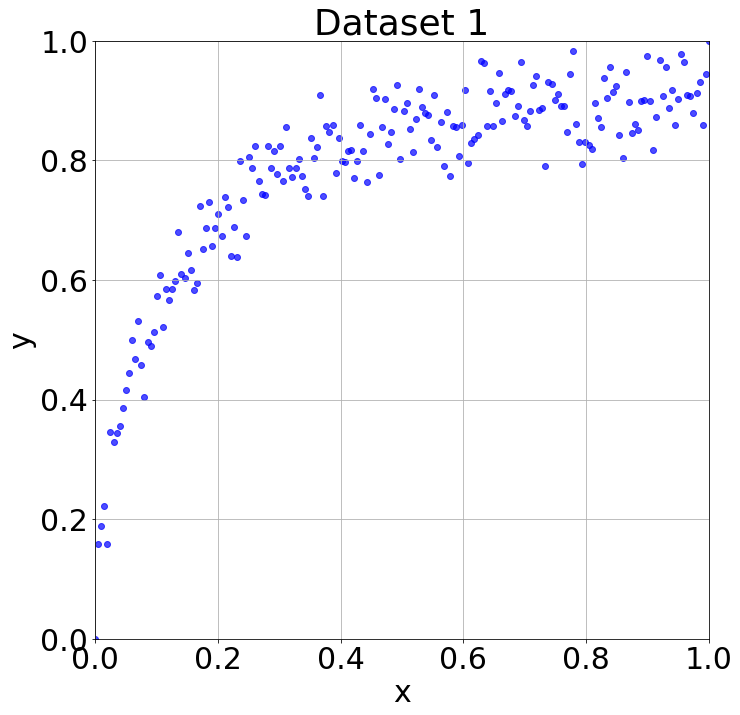

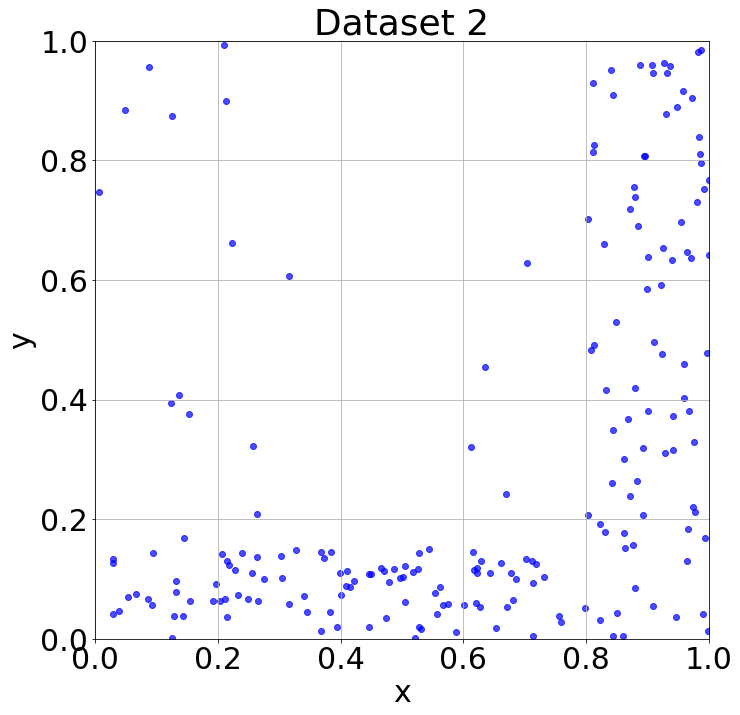

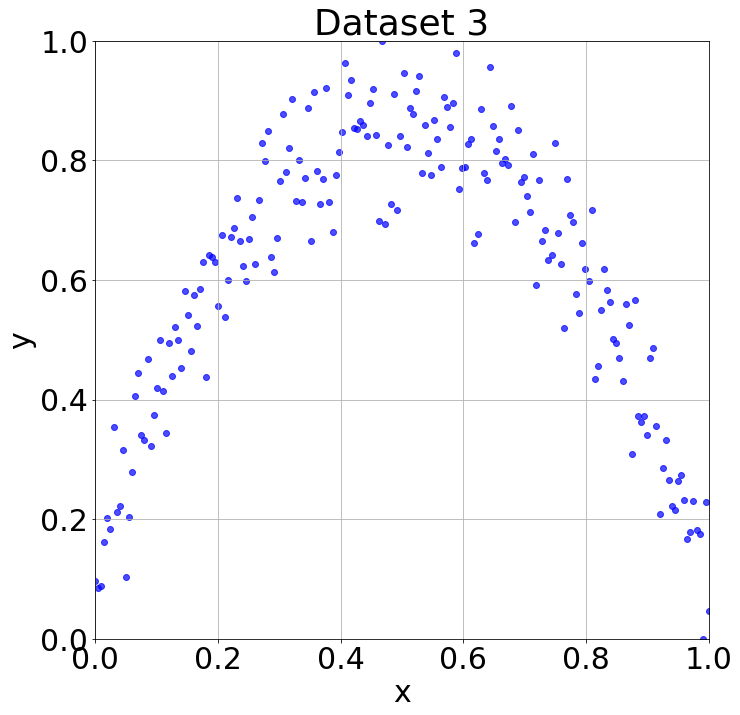

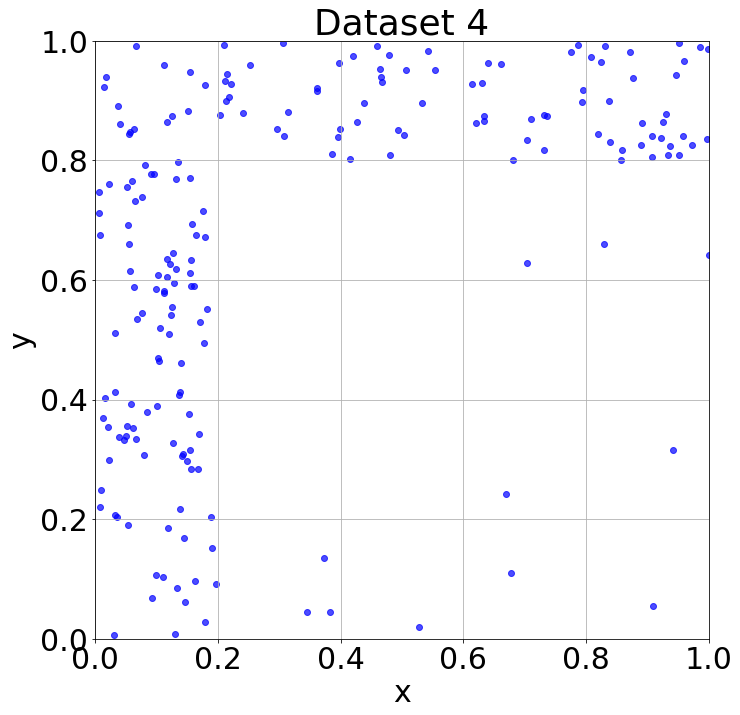

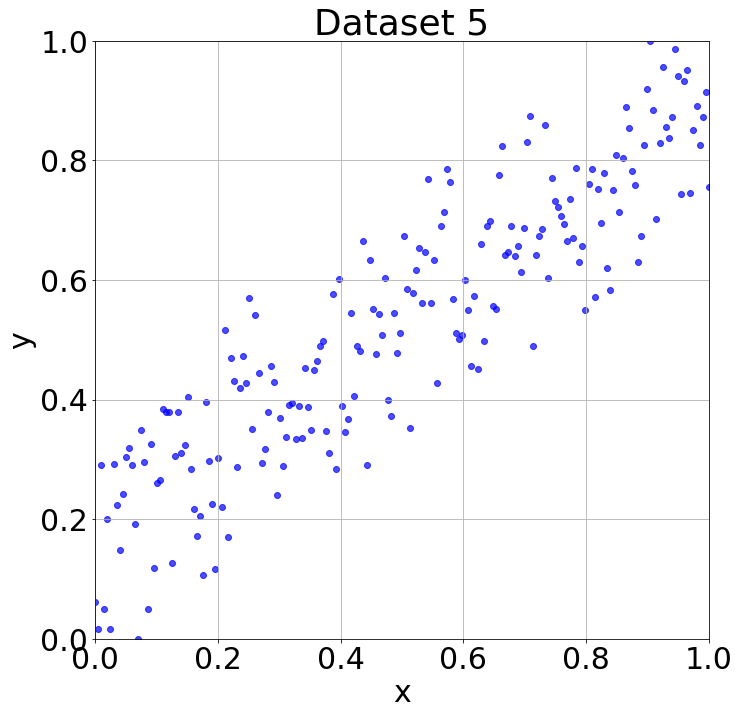

In [245]:
from scipy import stats
PRETTY_DATASETS_CUP = 200
x = np.linspace(0, 8, PRETTY_DATASETS_CUP).reshape(-1, 1)

np.random.seed(20)
noise0 = np.random.random(size=(PRETTY_DATASETS_CUP, 1)) / 8
np.random.seed(26)
noise1 = np.random.random(size=(PRETTY_DATASETS_CUP, 1)) / 8
np.random.seed(30)
noise2 = np.random.random(size=(PRETTY_DATASETS_CUP, 1)) / 4
np.random.seed(36)
noise3 = np.random.random(size=(PRETTY_DATASETS_CUP, 1)) / 4
np.random.seed(40)
noise4 = np.random.random(size=(PRETTY_DATASETS_CUP, 1)) / 3
np.random.seed(46)
noise5 = np.random.random(size=(PRETTY_DATASETS_CUP, 1)) / 3


chi2_y = stats.chi2(df=1).cdf(x) + noise0 - noise1
chi2_y = (chi2_y - np.min(chi2_y)) / (np.max(chi2_y) - np.min(chi2_y))

parab = -4 * (x/8 -  0.5)**2 + 1 + noise2 - noise3
parab = (parab - np.min(parab)) / (np.max(parab) - np.min(parab))

print(x.shape, np.random.random(size=(30, 1)).shape)
linear = x / 8 + noise4 - noise5
linear = (linear - np.min(linear)) / (np.max(linear) - np.min(linear))

np.random.seed(20)
Pretty_datasets = [
    np.hstack((x / 8, chi2_y)),
    data_generator(PRETTY_DATASETS_CUP, [(0, 0.8, 0, 0.15), (0.8, 1, 0, 1)], density=[0.45, 0.38], random_state=random_state),
    np.hstack((x / 8, parab)),
    data_generator(PRETTY_DATASETS_CUP, [(0, 0.2, 0, 0.8), (0, 1, 0.8, 1)], density=[0.45, 0.45], random_state=random_state),
    np.hstack((x / 8, linear))
]

matplotlib.rcParams.update({'font.size': 30})
for i, data in enumerate(Pretty_datasets):
    plt.figure(figsize=[11,11])
    plt.scatter(data[:, 0], data[:, 1], alpha=0.7, marker="o", c="blue")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim(0, 1.)
    plt.ylim(0, 1.)
    plt.grid(True)
    plt.title("Dataset " + str(i + 1))
    plt.savefig("Dataset" + str(i + 1) + ".png")
    plt.show()

In [246]:
def ApproxPlot(x, y, predict, name=""):
    """
    Build 2 graphices in the same plot:
    scatter data plot and approximation curve
    """
    matplotlib.rcParams.update({'font.size': 18})
    y_pred = [predict(x_i) for x_i in x]
    loss = np.sum(np.abs(y - y_pred))
    lin_loss = np.sum(np.abs(y - x))
    print(name, "loss =", loss)
    print("liear function loss =", lin_loss)
    
    plt.figure(figsize=[11,11])
    plt.scatter(x, y, alpha=0.8, marker="o", label="training points")
    x_approx = np.linspace(0, 1, 101)
    y_approx = [predict(x_i) for x_i in x_approx]
    plt.plot(x_approx, y_approx, c = 'r', linewidth=1.5, label="Approximation curve")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(name + " approximation")
    plt.xlim(0, 1.)
    plt.ylim(0, 1.)
    plt.grid()
    plt.legend(loc='best')
    #plt.show()

In [247]:
import time
def RunTests(estimator, datasets, name=""):
    """
    Fit estimator on each dataset in datasets
    Calculate losses
    Build approximation curve
    """
    matplotlib.rcParams.update({'font.size': 18})
    for i, data in enumerate(datasets):
        print("Dataset", i, ":")
        start_time = time.time()
        losses = estimator.fit(data[:, 0], data[:, 1])
        print("Fitting time:", (time.time() - start_time) / 60, "min")
        print("alpha, beta:", estimator.alpha, estimator.beta)
        ApproxPlot(data[:, 0], data[:, 1], estimator.PredictProba, name)
        plt.savefig(name + "Plot" + str(i))
        plt.show()
        plt.scatter(np.arange(1, len(losses) + 1), losses, marker='.', c='blue')
        plt.title("Losses")
        plt.xlabel("Epoch")
        plt.ylabel("L1 discrepancy")
        #plt.legend(loc="best")
        plt.grid()
        plt.savefig(name + "losses" + str(i))
        plt.show()

In [7]:
REG=0
SMALL_CONST = 1e-16
class BetaRegression:
    def __init__(self):
        pass
        
    def LossFunc(self, x, y, reg=REG):
        loss = 0
        for i, x_i in enumerate(x):
            loss += torch.abs(self.PredictProba(x_i) - y[i]) + reg * ((self.alpha - 1) ** 2 + (self.beta - 1) ** 2)
        return loss
    
    def PredictProba(self, x):
        return Beta(self.alpha, self.beta, x)
    
    def InitParams(self, random_state=None):
        if random_state != None:
            np.random.seed(random_state)
        device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
        self.alpha = torch.tensor(np.random.random(1)[0] + 2, dtype=float) #(torch.randn(1, dtype=torch.float) + 1) / 2
        self.alpha.to(device)
        self.alpha.requires_grad_()
    
        self.beta = torch.tensor(np.random.random(1)[0] + 2, dtype=float) #(torch.randn(1, dtype=torch.float) + 1) / 2
        self.beta.to(device)
        self.beta.requires_grad_()
    
    def fit(self, x, y, num_epochs=200, lr=0.1, reg=REG, random_state=None):
        self.InitParams(random_state)
        device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

        self.best_alpha = self.alpha.item()
        self.best_beta  = self.beta.item()
        self.best_loss  = len(y)
        self.best_ep    = 1


        if isinstance(x, torch.Tensor) == False:
            x = torch.tensor(x, dtype=float, requires_grad = False, device=device)
        if isinstance(y, torch.Tensor) == False:
            y = torch.tensor(y, dtype=float, requires_grad = False, device=device)
        loss = []
        #print(x, y)
        
        optimizer = torch.optim.Adam([self.alpha, self.beta], lr=lr)
        
        self.InitAB = [self.alpha.item(), self.beta.item()]
        
        for ep in np.arange(num_epochs):
            
            loss_i = self.LossFunc(x, y, reg)
            if loss_i < self.best_loss:
                self.best_loss = loss_i.item()
                self.best_alpha = self.alpha.item()
                self.best_beta  = self.beta.item()
                self.best_ep    = ep
            loss_i.backward()
            optimizer.step()
            
            if self.alpha.data < 0:
                self.alpha.data = torch.tensor(SMALL_CONST, dtype=float)
            if self.beta.data < 0:
                self.beta.data = torch.tensor(SMALL_CONST, dtype=float)
            
            optimizer.zero_grad()
            
            loss.append(loss_i.data.item())
        self.loss = loss
        self.alpha = self.best_alpha
        self.beta = self.best_beta
        return loss


In [250]:
from collections import deque
from functools import lru_cache
from scipy.interpolate import splrep, splev, PchipInterpolator, interp1d
from scipy.signal import savgol_filter

class GridSearch:
    def __init__(self):
        pass
    
    #HORIZONTAL = 0
    #SLOPE      = 1
    #VERTICAL   = 2
    
    def CalcStepLoss(self, row, col, x, y):
        mask = np.logical_and(x >= col / self.nx, x < (col + 1) / self.nx)
        if row % 2 == 0:
            return np.sum(np.abs(math.floor(row / 2) / self.ny - y[mask]))
        else:
            return np.sum(np.abs((self.nx / self.ny) * (x[mask] - col / self.n_col) 
                                 + math.floor(row / 2) / self.ny - y[mask]))
        
    def LinPlot(self, x, y):
        matplotlib.rcParams.update({'font.size': 28})
        x_approx = []
        y_approx = [0]
        for i in np.arange(self.nx + 1):
            x_approx.append(i / self.nx)
            x_approx.append(i / self.nx)
        for el in self.min_path:
            y_approx.append(math.floor(el / 2) / self.ny)
            y_approx.append(math.ceil (el / 2) / self.ny)
        y_approx.append(1)
        
        lin_loss = np.sum(np.abs(y - x))
    
        plt.figure(figsize=[11,11])
        plt.scatter(x, y, alpha=0.8, marker="o", label="training points")
        plt.plot(x_approx, y_approx, c = 'r', linewidth=1.5, label="Approximation curve")
        
        plt.xlabel("x")
        plt.ylabel("y")
        plt.xlim(0, 1.)
        plt.ylim(0, 1.)
        
        plt.legend(loc='best')
        plt.title("Grid search approximation")
        plt.grid(True)
        #plt.savefig("GridSearchPlot" + str(np.random.randint(1000)) + ".png")
        plt.show()
    
    @lru_cache(maxsize=None)
    def GetLossRec(self, row, col):
        self.rec_iter += 1   # unnecessary
        curr_stack = deque() # path in grid
        
        if col == self.n_col:
            return 0, curr_stack
            
        curr_min_loss = math.inf
        curr_jump     = 0
        
        for vert_jump in np.arange(row, self.n_row - 1, 2):
            SlopeLoss, SlopeStack = self.GetLossRec(vert_jump + 2, col + 1)
            HorizLoss, HorizStack = self.GetLossRec(vert_jump, col + 1)
            SlopeStack = SlopeStack.copy()
            HorizStack = HorizStack.copy()
            
            SlopeLoss += self.grid_losses[vert_jump + 1, col]
            HorizLoss += self.grid_losses[vert_jump, col]
            
            if SlopeLoss < curr_min_loss and SlopeLoss < HorizLoss:
                curr_stack    = SlopeStack
                curr_min_loss = SlopeLoss
                curr_jump     = vert_jump + 1
                
            elif HorizLoss < curr_min_loss:
                curr_stack    = HorizStack
                curr_min_loss = HorizLoss
                curr_jump     = vert_jump
            
        #Last iteration
        self.rec_iter += self.n_col - col
        HorizLoss = np.sum(self.grid_losses[self.n_row - 1, col:]) #Vertical top line
        
        if HorizLoss < curr_min_loss:
            curr_min_loss = HorizLoss
            curr_jump = self.n_row - 1
            #Correcting path
            path_len = len(curr_stack)
            curr_stack.clear()
            curr_stack.extend([self.n_row - 1] * path_len)
         
        curr_stack.append(curr_jump)
        return curr_min_loss, curr_stack
        
    #@lru_cache(maxsize=None)
    def fit(self, x, y, nx=10, ny=10, rec=False):
        if nx <= 0 or ny <= 0:
            return math.inf, deque()
        self.nx = nx
        self.ny = ny
        self.n_col = nx
        self.n_row = 2 * ny + 1
        self.min_path  = deque()
        self.min_loss = 0
        
        
        self.grid_shape = (self.n_row, self.n_col)
        self.grid_losses = np.zeros(shape=self.grid_shape)

        for j in np.arange(self.grid_shape[1]):
            for i in np.arange(self.grid_shape[0]):
                self.grid_losses[i, j] = self.CalcStepLoss(i, j, x, y)


        self.rec_iter = 0
        self.min_loss, self.min_path = self.GetLossRec(0, 0)
        self.GetLossRec.cache_clear()
        
        self.min_path = np.array([self.min_path.pop() for _ in np.arange(len(self.min_path))])

        if rec == True:
            gr1 = GridSearch()
            alt_loss1, alt_path1 = gr1.fit(x, y, math.floor(self.nx - 1), self.ny)
            gr2 = GridSearch()
            alt_loss2, alt_path2 = gr2.fit(x, y, self.nx, math.floor(self.ny - 1), rec=True)
        
            if alt_loss1 < self.min_loss and alt_loss1 < alt_loss2:
                self.min_loss = alt_loss1
                self.min_path = alt_path1.copy()
                self.nx       = gr1.nx
                self.ny       = gr1.ny
            if alt_loss2 < self.min_loss:
                self.min_loss = alt_loss2
                self.min_path = alt_path2.copy()
                self.nx       = gr2.nx
                self.ny       = gr2.ny
                
        self.grid_losses = np.flip(self.grid_losses, axis=0)
        
        return self.min_loss, self.min_path
        
        

Excecution time = 0.5547914544741313 min
loss = 6.612206944243372
nx, ny = 64 61


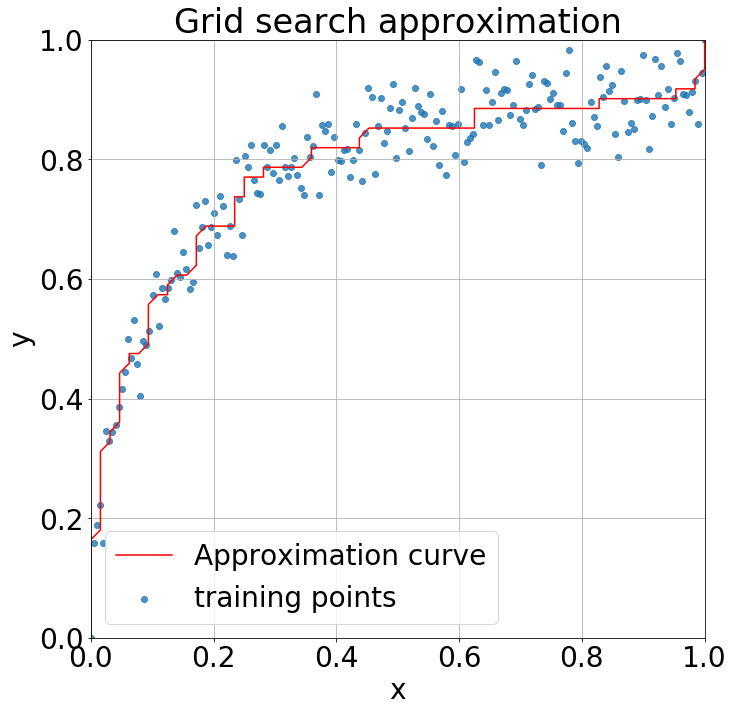

Excecution time = 0.48781290849049885 min
loss = 33.43360313377994
nx, ny = 63 37


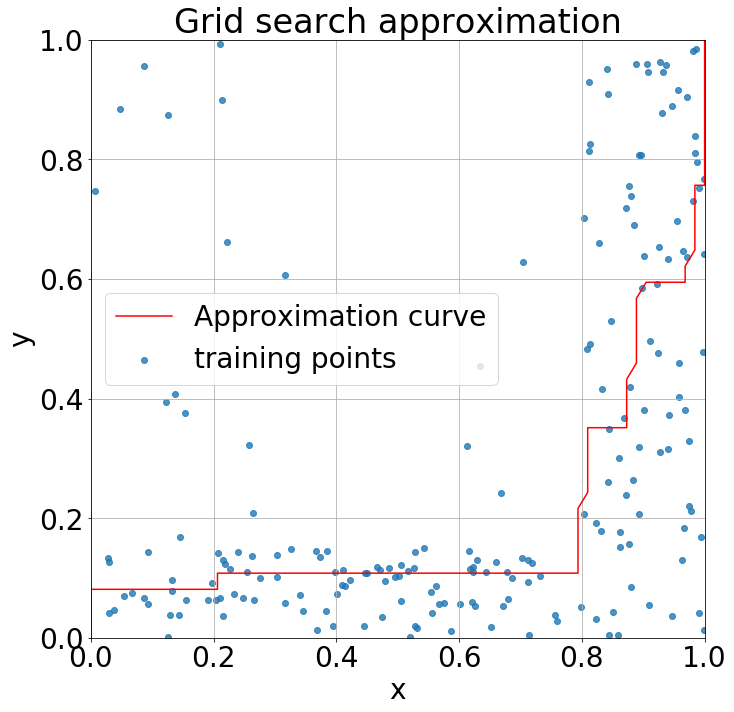

Excecution time = 0.5316165924072266 min
loss = 26.570920513358157
nx, ny = 63 54


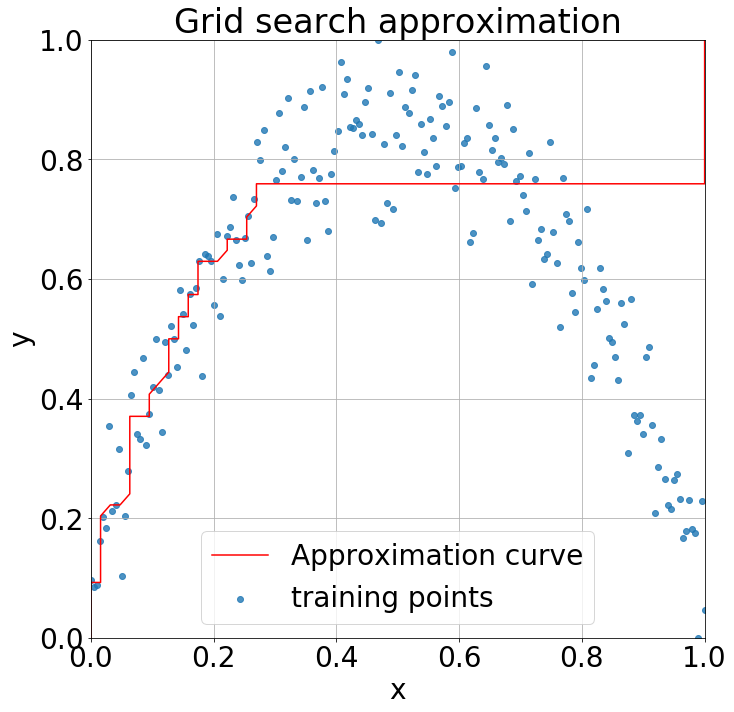

Excecution time = 0.5694148540496826 min
loss = 34.420473679979644
nx, ny = 64 64


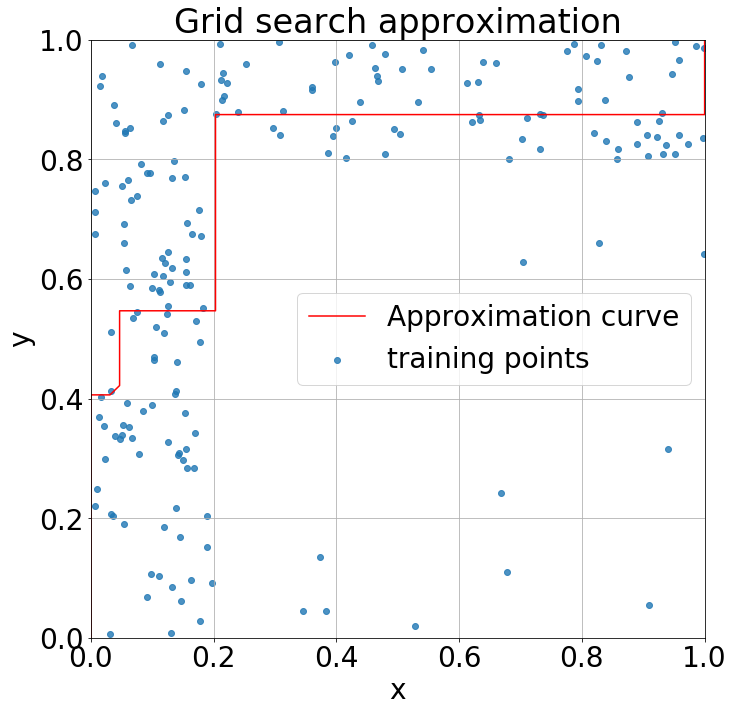

Excecution time = 0.49606688022613527 min
loss = 14.397337987818911
nx, ny = 63 41


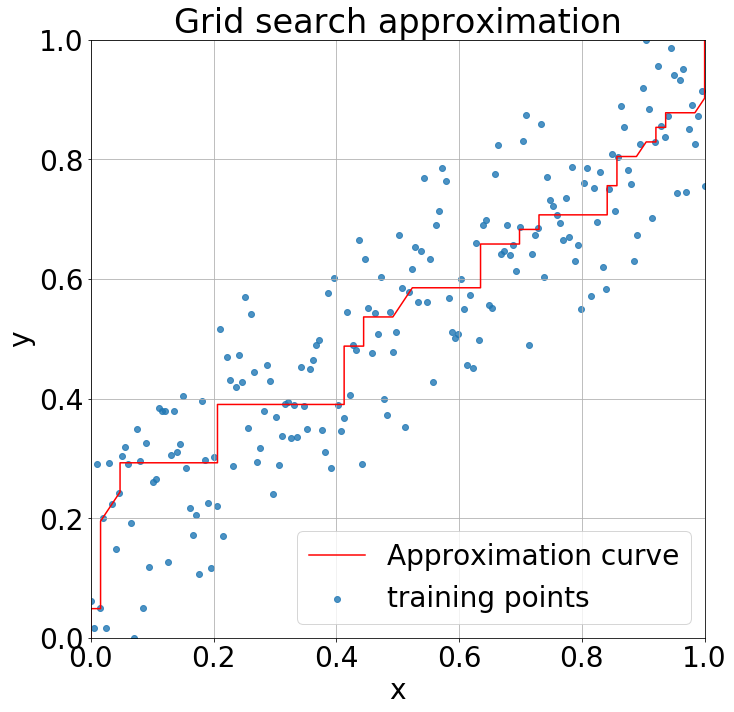

In [261]:
import time
for i, dataset in enumerate(Pretty_datasets):
    gs = GridSearch()
    start_time = time.time()
    lossg, path = gs.fit(dataset[:, 0], dataset[:, 1], nx=64, ny=64, rec=True) # 256, 256
    print("Excecution time =", (time.time() - start_time) / 60, "min")
    print("loss =", lossg)
    print("nx, ny =", gs.nx, gs.ny)
    gs.LinPlot(dataset[:, 0], dataset[:, 1])

In [ ]:
def ApproxPlot(x, y, predict, name=""):
    """
    Build 2 graphices in the same plot:
    scatter data plot and approximation curve
    """
    matplotlib.rcParams.update({'font.size': 20})
    y_pred = [predict(x_i) for x_i in x]
    loss = np.sum(np.abs(y - y_pred))
    lin_loss = np.sum(np.abs(y - x))
    print(name, "loss =", loss)
    print("liear function loss =", lin_loss)
    
    plt.figure(figsize=[11,11])
    plt.scatter(x, y, alpha=0.8, marker="o", label="training points")
    x_approx = np.linspace(0, 1, 101)
    y_approx = [predict(x_i) for x_i in x_approx]
    plt.plot(x_approx, y_approx, c = 'r', linewidth=1.5, label="Approximation curve")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim(0, 1.)
    plt.ylim(0, 1.)
    plt.legend(loc='best')
    plt.show()

In [252]:
#import logging
#import threading

class GridSearchOpt:
    def __init__(self):
        pass
    
    def CalcStepLoss(self, row, col, x, y):
        mask = np.logical_and(x >= col / self.nx, x < (col + 1) / self.nx)
        if row % 2 == 0:
            return np.sum(np.abs(math.floor(row / 2) / self.ny - y[mask]))
        else:
            return np.sum(np.abs((self.nx / self.ny) * (x[mask] - col / self.n_col) 
                                 + math.floor(row / 2) / self.ny - y[mask]))
        
    def LinPlot(self, x, y):
        matplotlib.rcParams.update({'font.size': 20})
        x_approx = []
        y_approx = [0]
        
        for i in np.arange(self.nx + 1):
            x_approx.append(i / self.nx)
        for el in self.min_path:
            y_approx.append(math.ceil (el / 2) / self.ny)
        
        lin_loss = np.sum(np.abs(y - x))
        print("LinGrid loss =", self.min_loss)
        print("liear function loss =", lin_loss)
    
        plt.figure(figsize=[11,11])
        plt.scatter(x, y, alpha=0.8, marker=".", label="training points")
        
        print(len(x_approx), len(y_approx))
        print(x_approx, y_approx)
        
        pi = PchipInterpolator(x_approx, y_approx)
        y_pi = pi(np.linspace(0, 1, 1000))
        
        plt.plot(np.linspace(0, 1, 1000), y_pi, c = 'y', linewidth=1.5, label="Smoothed curve")

        plt.plot(x_approx, y_approx, c = 'r', linewidth=1, label="Approximation curve")
        
        plt.xlabel("x")
        plt.ylabel("y")
        plt.xlim(0, 1.)
        plt.ylim(0, 1.)
        
        plt.legend(loc='best')
        plt.title("Grid search approximation")
        #plt.savefig("GridSearchPlotNorm" + str(1) + ".png")
        plt.show()
    
    @lru_cache(maxsize=None)
    def GetLossRec(self, row, col):
        self.rec_iter += 1
        curr_stack = deque()
        
        if col == self.n_col or row == self.n_row:
            return 0, curr_stack
        
        if row == self.n_row - 1:
            curr_stack.extend([self.n_row - 1] * (self.n_col - col))
            return np.sum(self.grid_losses[row, col:]), curr_stack
        
        self.grid_losses[row + 1, col]
        curr_min_loss, curr_stack = self.GetLossRec(row + 2, col + 1)
        curr_min_loss += self.grid_losses[row + 1, col]
        curr_row  = row + 1
        
        if(math.floor((self.n_row - row) / 2) < self.n_col - col):
            HorizLoss, HorizStack = self.GetLossRec(row, col + 1)
            HorizLoss += self.grid_losses[row, col]
            
            if HorizLoss < curr_min_loss:
                curr_min_loss = HorizLoss
                curr_stack    = HorizStack
                curr_row      = row 
        
        curr_stack = curr_stack.copy()
        curr_stack.append(curr_row)
         
        return curr_min_loss, curr_stack
        
    
    def fit(self, x, y, nx=10, ny=10, rec=False):
        if nx <= 0 or ny <= 0 or nx < ny:
            return math.inf, deque()
        self.nx = nx
        self.ny = ny
        self.n_col = nx
        self.n_row = 2 * ny + 1
        self.min_path  = deque()
        self.min_loss = 0
        
        self.grid_shape = (self.n_row, self.n_col)
        self.grid_losses = np.zeros(shape=self.grid_shape)

        for j in np.arange(self.grid_shape[1]):
            for i in np.arange(self.grid_shape[0]):
                self.grid_losses[i, j] = self.CalcStepLoss(i, j, x, y)


        self.arr = np.zeros(self.n_col)
        self.rec_iter = 0
        self.min_loss, self.min_path = self.GetLossRec(0, 0)
        
        self.GetLossRec.cache_clear()
        self.min_path = np.array([self.min_path.pop() for _ in np.arange(len(self.min_path))])
        
        if rec == True:
            gr1 = GridSearchOpt()
            alt_loss1, alt_path1 = gr1.fit(x, y, math.floor(self.nx - 1), self.ny)
            gr2 = GridSearchOpt()
            alt_loss2, alt_path2 = gr2.fit(x, y, self.nx, math.floor(self.ny - 1), rec=True)
        
            if alt_loss1 < self.min_loss and alt_loss1 < alt_loss2:
                self.min_loss = alt_loss1
                self.min_path = alt_path1.copy()
                self.nx       = gr1.nx
                self.ny       = gr1.ny
                
            if alt_loss2 < self.min_loss:
                self.min_loss = alt_loss2
                self.min_path = alt_path2.copy()
                self.nx       = gr2.nx
                self.ny       = gr2.ny
        
        self.grid_losses = np.flip(self.grid_losses, axis=0)

        return self.min_loss, self.min_path

Excecution time = 0.019194638729095458 min
loss = 11.0947095076831
nx, ny = 32 7
LinGrid loss = 11.0947095076831
liear function loss = 58.22379342695287
33 33
[0.0, 0.03125, 0.0625, 0.09375, 0.125, 0.15625, 0.1875, 0.21875, 0.25, 0.28125, 0.3125, 0.34375, 0.375, 0.40625, 0.4375, 0.46875, 0.5, 0.53125, 0.5625, 0.59375, 0.625, 0.65625, 0.6875, 0.71875, 0.75, 0.78125, 0.8125, 0.84375, 0.875, 0.90625, 0.9375, 0.96875, 1.0] [0, 0.14285714285714285, 0.2857142857142857, 0.42857142857142855, 0.5714285714285714, 0.5714285714285714, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.857142857

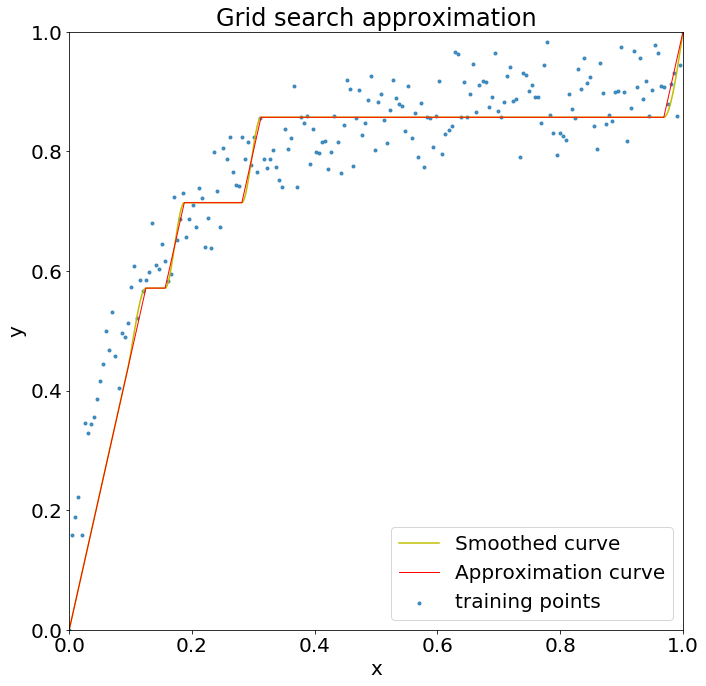

Excecution time = 0.019764026006062824 min
loss = 38.169243239477055
nx, ny = 32 8
LinGrid loss = 38.169243239477055
liear function loss = 74.32547498976234
33 33
[0.0, 0.03125, 0.0625, 0.09375, 0.125, 0.15625, 0.1875, 0.21875, 0.25, 0.28125, 0.3125, 0.34375, 0.375, 0.40625, 0.4375, 0.46875, 0.5, 0.53125, 0.5625, 0.59375, 0.625, 0.65625, 0.6875, 0.71875, 0.75, 0.78125, 0.8125, 0.84375, 0.875, 0.90625, 0.9375, 0.96875, 1.0] [0, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.25, 0.375, 0.375, 0.5, 0.625, 0.75, 0.875, 1.0]


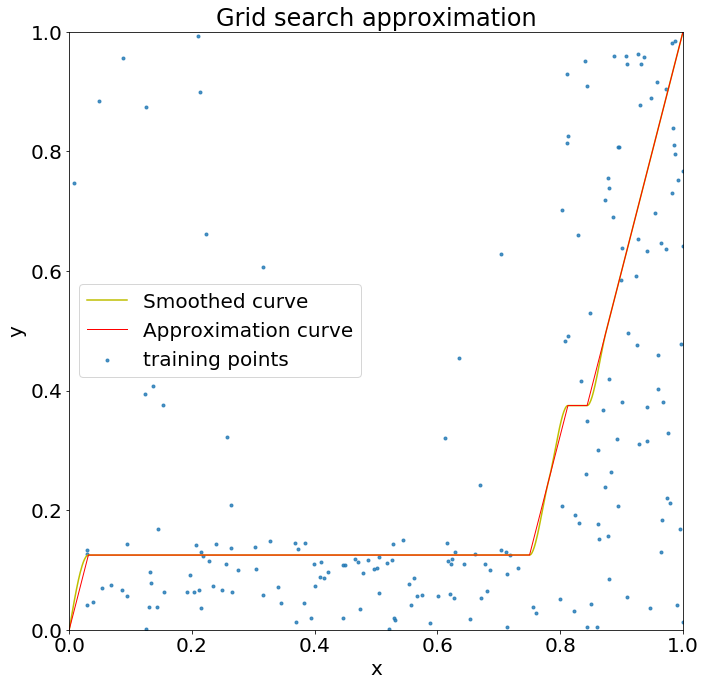

Excecution time = 0.023393789927164715 min
loss = 28.816355127721522
nx, ny = 31 4
LinGrid loss = 28.816355127721522
liear function loss = 69.73840848365876
32 32
[0.0, 0.03225806451612903, 0.06451612903225806, 0.0967741935483871, 0.12903225806451613, 0.16129032258064516, 0.1935483870967742, 0.22580645161290322, 0.25806451612903225, 0.2903225806451613, 0.3225806451612903, 0.3548387096774194, 0.3870967741935484, 0.41935483870967744, 0.45161290322580644, 0.4838709677419355, 0.5161290322580645, 0.5483870967741935, 0.5806451612903226, 0.6129032258064516, 0.6451612903225806, 0.6774193548387096, 0.7096774193548387, 0.7419354838709677, 0.7741935483870968, 0.8064516129032258, 0.8387096774193549, 0.8709677419354839, 0.9032258064516129, 0.9354838709677419, 0.967741935483871, 1.0] [0, 0.25, 0.25, 0.5, 0.5, 0.5, 0.5, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 1.0]


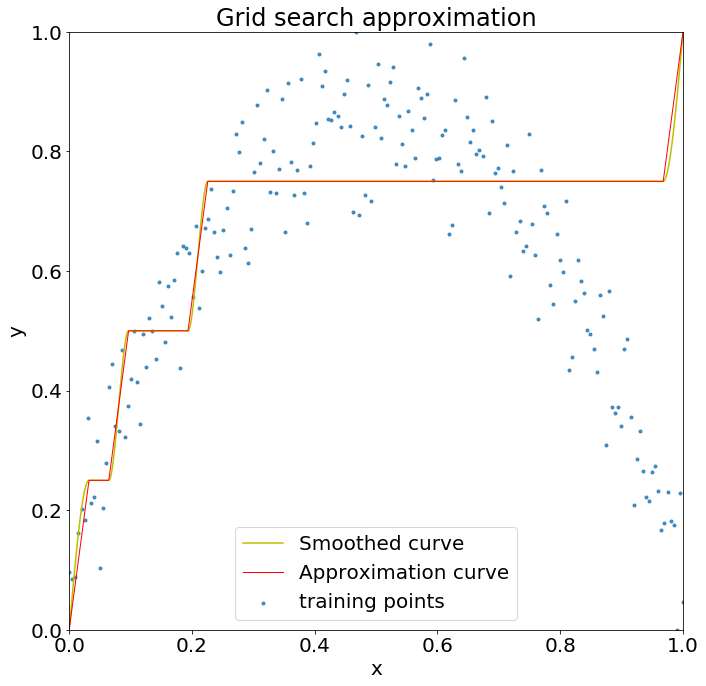

Excecution time = 0.023098429044087727 min
loss = 41.224563342506386
nx, ny = 32 6
LinGrid loss = 41.224563342506386
liear function loss = 74.33146469085386
33 33
[0.0, 0.03125, 0.0625, 0.09375, 0.125, 0.15625, 0.1875, 0.21875, 0.25, 0.28125, 0.3125, 0.34375, 0.375, 0.40625, 0.4375, 0.46875, 0.5, 0.53125, 0.5625, 0.59375, 0.625, 0.65625, 0.6875, 0.71875, 0.75, 0.78125, 0.8125, 0.84375, 0.875, 0.90625, 0.9375, 0.96875, 1.0] [0, 0.16666666666666666, 0.3333333333333333, 0.5, 0.5, 0.5, 0.6666666666666666, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.83333333333

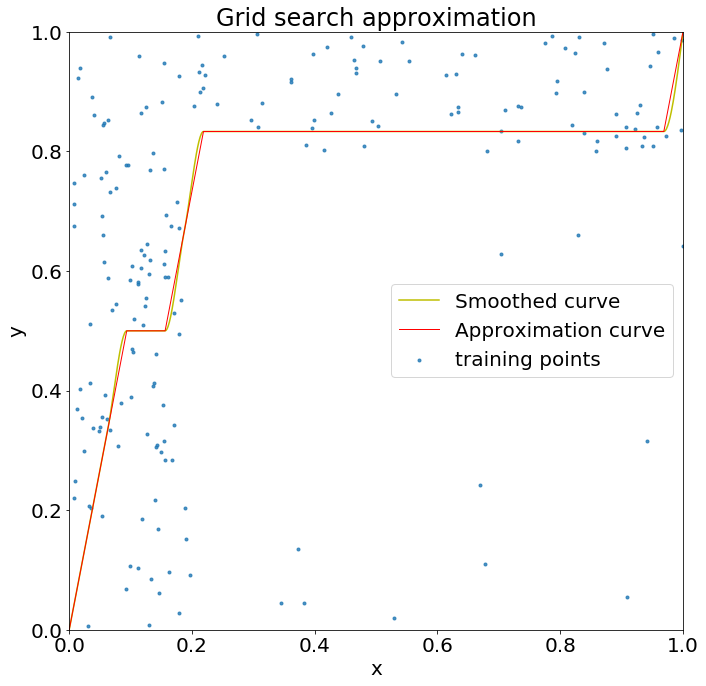

Excecution time = 0.029206577936808267 min
loss = 16.03760639602404
nx, ny = 31 7
LinGrid loss = 16.03760639602404
liear function loss = 21.78666536213388
32 32
[0.0, 0.03225806451612903, 0.06451612903225806, 0.0967741935483871, 0.12903225806451613, 0.16129032258064516, 0.1935483870967742, 0.22580645161290322, 0.25806451612903225, 0.2903225806451613, 0.3225806451612903, 0.3548387096774194, 0.3870967741935484, 0.41935483870967744, 0.45161290322580644, 0.4838709677419355, 0.5161290322580645, 0.5483870967741935, 0.5806451612903226, 0.6129032258064516, 0.6451612903225806, 0.6774193548387096, 0.7096774193548387, 0.7419354838709677, 0.7741935483870968, 0.8064516129032258, 0.8387096774193549, 0.8709677419354839, 0.9032258064516129, 0.9354838709677419, 0.967741935483871, 1.0] [0, 0.14285714285714285, 0.2857142857142857, 0.2857142857142857, 0.2857142857142857, 0.2857142857142857, 0.2857142857142857, 0.42857142857142855, 0.42857142857142855, 0.42857142857142855, 0.42857142857142855, 0.4285714285

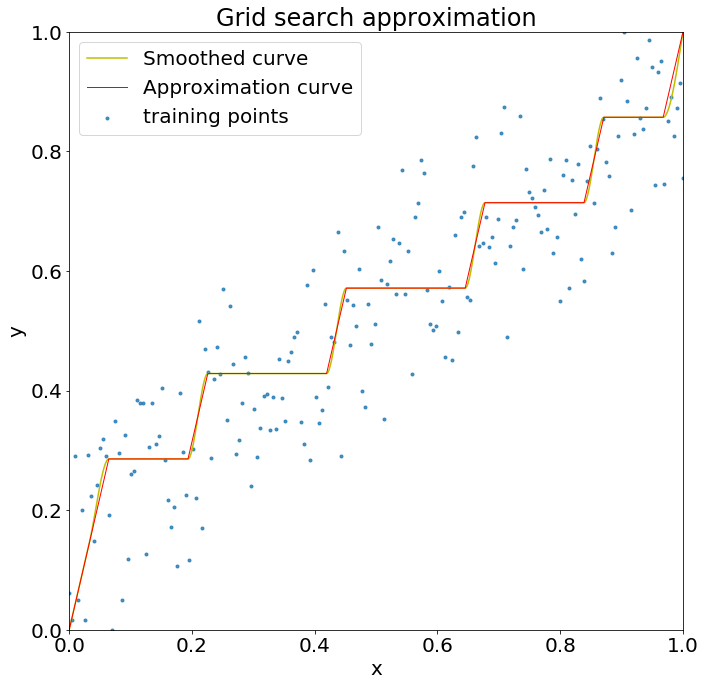

In [254]:
import time
for i, dataset in enumerate(Pretty_datasets):
    gso = GridSearchOpt()
    start_time = time.time()
    lossg, path = gso.fit(dataset[:, 0], dataset[:, 1], nx=32, ny=32, rec=True) # 256, 256
    print("Excecution time =", (time.time() - start_time) / 60, "min")
    print("loss =", lossg)
    print("nx, ny =", gso.nx, gso.ny)
    gso.LinPlot(dataset[:, 0], dataset[:, 1])

# Beta search approximation 
### grid search, but my beta regression replace linear functon

In [262]:
REG=0  #1e-1 / 2
SMALL_CONST = 1e-16
class BetaRegression2:
    def __init__(self):
        pass
        
    def LossFunc(self, x, y, reg=REG):
        loss = 0
        for i, x_i in enumerate(x):
            loss += torch.abs(self.PredictProba(x_i) - y[i]) + reg * ((self.alpha - 1) ** 2 + (self.beta - 1) ** 2)
        return loss
    
    def PredictProba(self, x):
        return (self.y2 - self.y1) * Beta(self.alpha, self.beta, (x - self.x1) / (self.x2 - self.x1)) + self.y1
    
    def InitParams(self, random_state=None):
        if random_state != None:
            np.random.seed(random_state)
        device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
        self.alpha = torch.tensor(np.random.random(1)[0] + 2, dtype=float) 
        self.alpha.to(device)
        self.alpha.requires_grad_()
    
        self.beta = torch.tensor(np.random.random(1)[0] + 2, dtype=float)
        self.beta.to(device)
        self.beta.requires_grad_()
    
    def fit(self, x, y, num_epochs=200, lr=0.1, x1=0, x2=1, y1=0, y2=1, reg=REG, random_state=None):
        self.InitParams(random_state)
        device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
        
        self.y1 = y1
        self.y2 = y2
        self.x1 = x1
        self.x2 = x2

        self.best_alpha = self.alpha.item()
        self.best_beta  = self.beta.item()
        self.best_loss  = len(y)
        self.best_ep    = 1


        if isinstance(x, torch.Tensor) == False:
            x = torch.tensor(x, dtype=float, requires_grad = False, device=device)
        if isinstance(y, torch.Tensor) == False:
            y = torch.tensor(y, dtype=float, requires_grad = False, device=device)
        loss = []
        
        optimizer = torch.optim.Adam([self.alpha, self.beta], lr=lr)
        
        self.InitAB = [self.alpha.item(), self.beta.item()]
        
        for ep in np.arange(num_epochs):
            
            loss_i = self.LossFunc(x, y, reg)
            if loss_i < self.best_loss:
                self.best_loss = loss_i.item()
                self.best_alpha = self.alpha.item()
                self.best_beta  = self.beta.item()
                self.best_ep    = ep
                
            loss_i.backward()
            optimizer.step()
            
            if self.alpha.data < 0:
                self.alpha.data = torch.tensor(SMALL_CONST, dtype=float)
            if self.beta.data < 0:
                self.beta.data = torch.tensor(SMALL_CONST, dtype=float)
            
            optimizer.zero_grad()
            
            loss.append(loss_i.data.item())
            
        self.loss = loss
        self.alpha = self.best_alpha
        self.beta = self.best_beta
        return loss


In [263]:
class GridSearchOpt:
    def __init__(self):
        pass
    
    def CalcStepLoss(self, row, col, x, y):
        mask = np.logical_and(x >= col / self.nx, x < (col + 1) / self.nx)
        if row % 2 == 0:
            return np.sum(np.abs(math.floor(row / 2) / self.ny - y[mask]))
        else:
            br = BetaRegression2()
            br.fit(x[mask], y[mask], num_epochs=10, lr=0.5, x1=col / self.nx, x2=(col + 1) / self.nx, y1=math.floor(row / 2) / self.ny, y2=(math.floor(row / 2) + 1) / self.ny)
            return np.sum(np.abs([br.PredictProba(x_i) for x_i in x[mask]] - y[mask]))
        
    def LinPlot(self, x, y):
        x_approx = []
        y_approx = []
        
        for i, step in enumerate(self.min_path):
            if step % 2 == 0:
                x_approx.append((i + 1) / (self.nx))
                y_approx.append(step / (2 * self.ny))
            else:
                mask = np.logical_and(x >= i / self.nx, x < (i + 1) / self.nx)
                
                odd = (1 / self.nx) / 200
                
                addition_x = np.linspace(i / self.nx + odd, (i+1) / self.nx - odd, 50)
                x_approx.extend(addition_x)
                
                br = BetaRegression2()
                br.fit(self.x[mask], self.y[mask], num_epochs=10, lr=0.5, x1=i / self.nx, x2=(i + 1) / self.nx, y1=math.floor(step / 2) / self.ny, y2=(math.floor(step / 2) + 1) / self.ny)
                y_approx.extend([br.PredictProba(x_i) for x_i in addition_x])
                
        
        lin_loss = np.sum(np.abs(y - x))
    
        plt.figure(figsize=[11,11])
        plt.scatter(x, y, alpha=0.8, marker="o", label="training points")
        

        plt.plot(x_approx, y_approx, c = 'r', linewidth=1.5, label="Approximation curve")
        
        #pi = PchipInterpolator(x_approx, y_approx)
        #y_pi = pi(np.linspace(0, 1, 1000))
        
        #plt.plot(np.linspace(0, 1, 1000), y_pi, c = 'y', linewidth=1, label="Smoothed approximation curve")
        
        plt.xlabel("x")
        plt.ylabel("y")
        plt.xlim(0, 1.)
        plt.ylim(0, 1.)
        plt.title("GridBetaSearch")
        plt.legend(loc='best')
        plt.savefig("GridBeta1.png")
        plt.show()
    
    @lru_cache(maxsize=None)
    def GetLossRec(self, row, col):
        self.rec_iter += 1
        curr_stack = deque()
        
        if col == self.n_col or row == self.n_row:
            return 0, curr_stack
        
        if row == self.n_row - 1:
            curr_stack.extend([self.n_row - 1] * (self.n_col - col))
            return np.sum(self.grid_losses[row, col:]), curr_stack
        
        self.grid_losses[row + 1, col]
        curr_min_loss, curr_stack = self.GetLossRec(row + 2, col + 1)
        curr_min_loss += self.grid_losses[row + 1, col]
        curr_row  = row + 1
        if(math.floor((self.n_row - row) / 2) < self.n_col - col):
            HorizLoss, HorizStack = self.GetLossRec(row, col + 1)
            HorizLoss += self.grid_losses[row, col]
            if HorizLoss < curr_min_loss:
                curr_min_loss = HorizLoss
                curr_stack    = HorizStack
                curr_row      = row 
        curr_stack = curr_stack.copy()
        curr_stack.append(curr_row)
         
        return curr_min_loss, curr_stack
        
    
    def fit(self, x, y, nx=10, ny=10, rec=False):
        if nx <= 0 or ny <= 0 or nx < ny:
            return math.inf, deque()
        self.nx = nx
        self.ny = ny
        self.n_col = nx
        self.n_row = 2 * ny + 1
        self.min_path  = deque()
        self.min_loss = 0
        self.x = x
        self.y = y
        
        
        
        self.grid_shape = (self.n_row, self.n_col)
        self.grid_losses = np.zeros(shape=self.grid_shape)

        for j in np.arange(self.grid_shape[1]):
            for i in np.arange(self.grid_shape[0]):
                self.grid_losses[i, j] = self.CalcStepLoss(i, j, x, y)


        self.arr = np.zeros(self.n_col)
        self.rec_iter = 0
        self.min_loss, self.min_path = self.GetLossRec(0, 0)
        #print(self.GetLossRec.cache_info())
        self.GetLossRec.cache_clear()
        self.min_path = np.array([self.min_path.pop() for _ in np.arange(len(self.min_path))])
        #self.min_path.popleft()
        if rec == True:
            gr1 = GridSearchOpt()
            alt_loss1, alt_path1 = gr1.fit(x, y, math.floor(self.nx - 1), self.ny)
            gr2 = GridSearchOpt()
            alt_loss2, alt_path2 = gr2.fit(x, y, self.nx, math.floor(self.ny - 1), rec=True)
        
            if alt_loss1 < self.min_loss and alt_loss1 < alt_loss2:
                self.min_loss = alt_loss1
                self.min_path = alt_path1.copy()
                self.nx       = gr1.nx
                self.ny       = gr1.ny
            if alt_loss2 < self.min_loss:
                self.min_loss = alt_loss2
                self.min_path = alt_path2.copy()
                self.nx       = gr2.nx
                self.ny       = gr2.ny
        
        self.grid_losses = np.flip(self.grid_losses, axis=0)
        #print(self.grid_losses)
        #print(self.min_path)
        return self.min_loss, self.min_path

In [ ]:
import time
dataset = Pretty_datasets[2]
#for i, dataset in enumerate(Pretty_datasets):
gso2 = GridSearchOpt()
start_time = time.time()
lossg, path = gso2.fit(dataset[:, 0], dataset[:, 1], nx=7, ny=5) # 256, 256
print("Excecution time =", (time.time() - start_time) / 60, "min")
print("loss =", lossg)
print("nx, ny =", gso2.nx, gso2.ny)
gso2.LinPlot(dataset[:, 0], dataset[:, 1])